<a href="https://colab.research.google.com/github/kzeynep/Python_Atil_hoca/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
df = pd.read_csv("2-multiplegradesdataset.csv")

In [15]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [16]:
df.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
45,2.9,5.5,93.9,3.4,65.9
46,3.3,7.3,83.8,2.1,72.8
47,5.6,7.3,83.4,3.2,81.1
48,4.5,7.0,92.6,3.1,91.0
49,1.4,6.8,91.5,1.9,68.8


In [17]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [19]:
df.shape

(50, 5)

In [20]:
df.isnull().sum()

,0
Study Hours,0
Sleep Hours,0
Attendance Rate,0
Social Media Hours,0
Exam Score,0


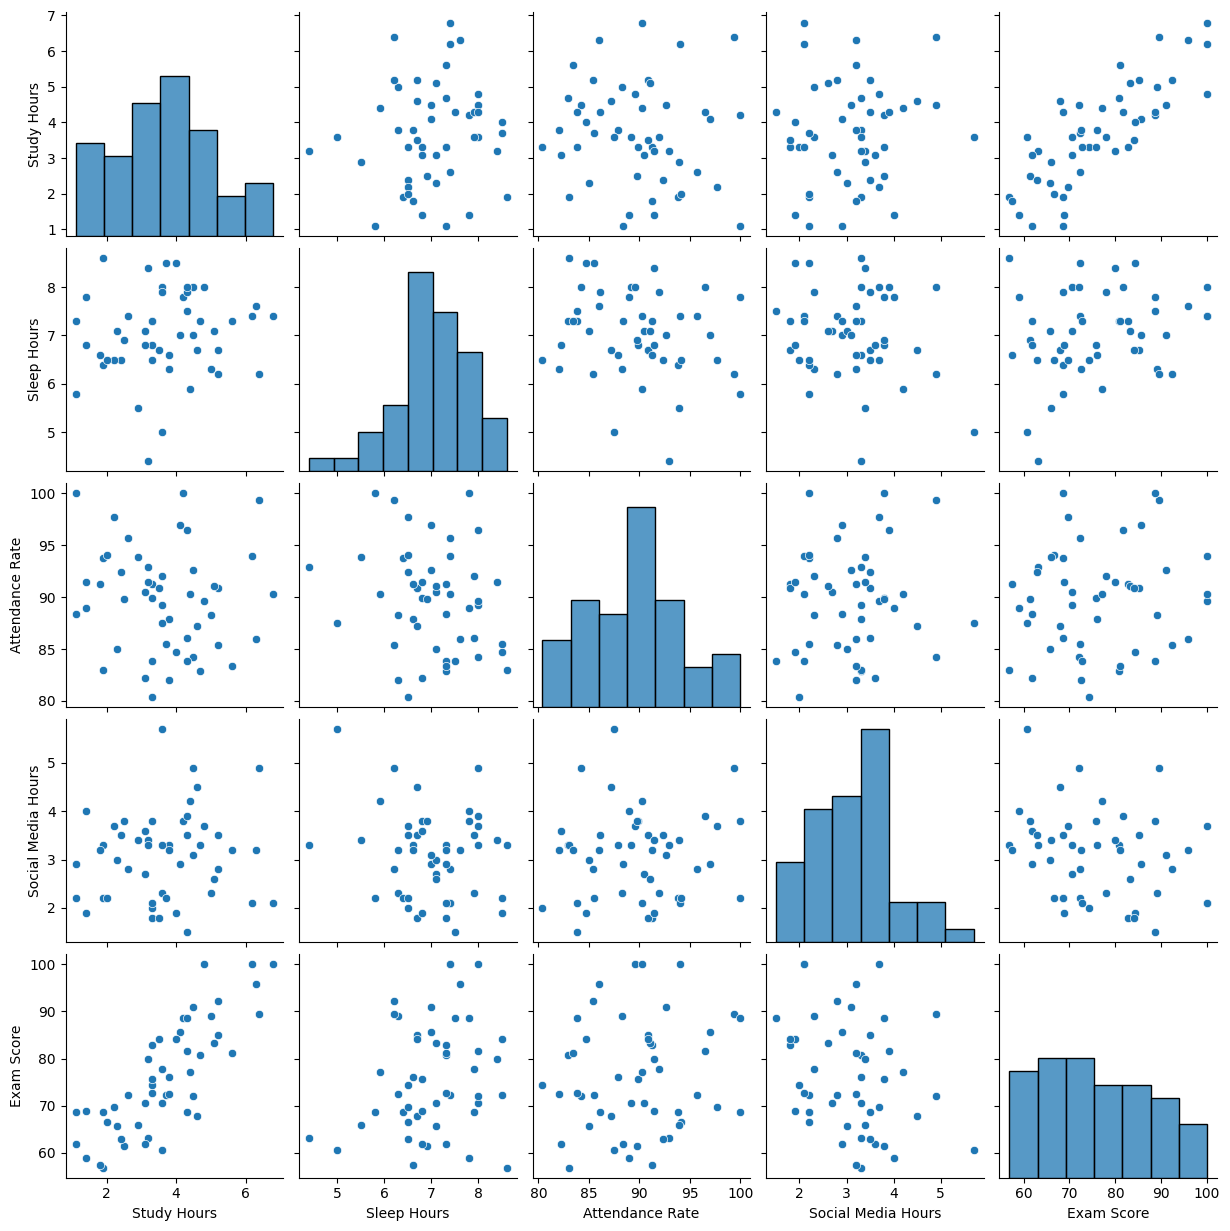

In [21]:
sns.pairplot(df)
plt.show()

In [22]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


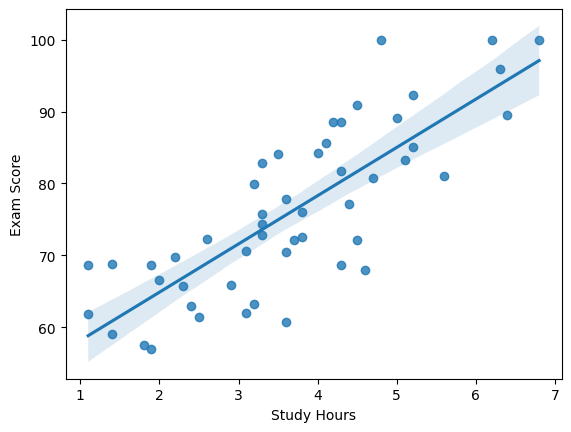

In [23]:
sns.regplot( x = 'Study Hours', y = 'Exam Score', data = df)
plt.show()

In [25]:
# independent and dependent features

X = df[["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"]]
y = df["Exam Score"]

In [26]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [27]:
X

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3
5,3.6,7.9,92.0,2.3
6,6.4,6.2,99.4,4.9
7,5.2,6.7,90.9,3.5
8,3.3,7.3,91.3,1.8
9,4.8,8.0,89.6,3.7


In [28]:
y.head()

,Exam Score
0,80.7
1,76.0
2,89.1
3,95.9
4,70.5


In [29]:
# train - test spilt

from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_test_scaled

array([[-1.87102793, -1.42405575,  2.36323351, -1.0704019 ],
       [ 0.37560974,  0.56435885, -1.34110929, -1.88263099],
       [-0.46687939, -0.2544001 , -1.70697031,  0.55405627],
       [-0.60729424, -1.77495244,  0.96838838,  0.32199082],
       [ 0.51602459,  1.14918667, -1.24964404,  2.06248171],
       [ 0.51602459, -0.02046897,  0.6711263 , -0.02610736],
       [-1.02853881,  0.09649659, -1.06671353, -0.14214009],
       [ 0.30540231,  0.91525554,  2.36323351,  0.78612172],
       [ 0.16498745,  1.7340145 , -1.13531247, -1.41850008],
       [-1.30936852, -0.72226236,  0.94552207, -1.0704019 ]])

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regression = LinearRegression()

In [37]:
regression.fit(X_train_scaled, y_train)

LinearRegression()

In [40]:
X_test_scaled[0]

array([-1.87102793, -1.42405575,  2.36323351, -1.0704019 ])

In [41]:
df.iloc[0]

,0
Study Hours,4.7
Sleep Hours,7.3
Attendance Rate,82.9
Social Media Hours,3.3
Exam Score,80.7


In [42]:
new_student = [[5 ,7,90,2]]

In [43]:
new_student_scaled = scaler.transform(new_student)

In [44]:
regression.predict(new_student_scaled)

array([89.82975404])

In [45]:
# predection

In [47]:
y_pred = regression.predict(X_test_scaled)

In [48]:
y_pred

array([65.20231057, 84.16613164, 64.95827287, 69.10443168, 72.32880266,
       83.14929328, 63.79238736, 83.41984016, 82.31003584, 68.25083429])

In [49]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [50]:
mse = mean_squared_error(y_test, y_pred)

In [51]:
mae = mean_absolute_error(y_test, y_pred)

In [52]:
print("mse :",mse)
print("mae : ",mae)

mse : 14.744713821185437
mae :  3.1700674066262584


In [53]:
score = r2_score(y_test, y_pred)

In [54]:
print(score)

0.8702442761946607


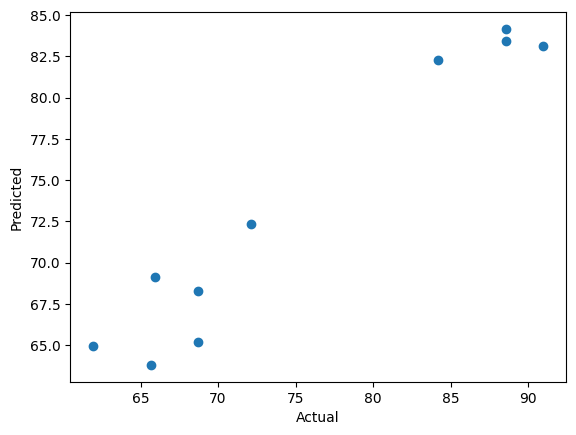

In [55]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [56]:
y_pred

array([65.20231057, 84.16613164, 64.95827287, 69.10443168, 72.32880266,
       83.14929328, 63.79238736, 83.41984016, 82.31003584, 68.25083429])

In [57]:
residuals = y_test - y_pred

In [58]:
residuals

,Exam Score
13,3.497689
39,4.433868
30,-3.058273
45,-3.204432
17,-0.228803
48,7.850707
26,1.907613
25,5.180160
32,1.889964
19,0.449166


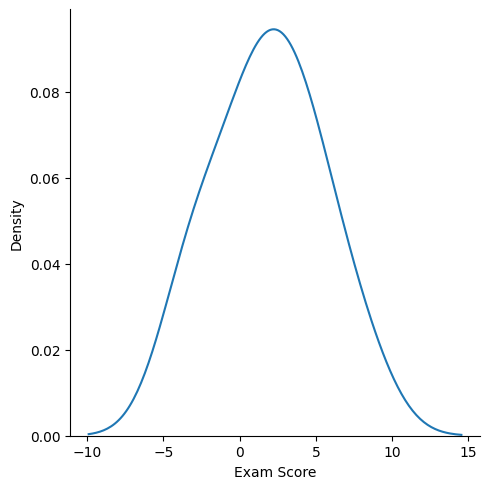

In [60]:
sns.displot(residuals, kind = "kde")
plt.show()

In [61]:
regression.intercept_

np.float64(76.2025)

In [62]:
regression.coef_

array([10.11954143,  1.22980868,  2.46755688, -3.60019752])

In [63]:
students = [
    [6,8,95,5],
    [3,6,85,4],
    [4,7,80,3]
]

In [64]:
regression.predict(scaler.transform(students))

array([88.66185082, 63.00595085, 72.90528407])